# EDA

This notebook looks at air quality for different states in the United States. The four pollutants are NO2, O3, SO2 and O3. 

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pollution_df = pd.read_csv("/content/pollution_us_2000_2016.csv")

### Explore Data

In [4]:
pollution_df.head(10)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
6,6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.937500,2.6,23,NaN,Parts per million,0.850000,1.6,23,NaN
7,7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.937500,2.6,23,NaN,Parts per million,1.066667,2.3,0,26.0
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8,48,Parts per million,0.007958,0.016,9,14,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.929167,4.4,8,NaN
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8,48,Parts per million,0.007958,0.016,9,14,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0


In [5]:
pollution_df.shape

(1746661, 29)

In [6]:
pollution_df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [7]:
pollution_df.describe(include = 'all')

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1746661,1746661,1746661,1746661,1746661,1746661,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1746661,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1746661,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1746661,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
unique,NaN,NaN,NaN,NaN,204,47,133,144,5996,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10,Parts per billion,NaN,NaN,NaN,NaN,Parts per million,NaN,NaN,NaN,NaN,Parts per billion,NaN,NaN,NaN,NaN,Parts per million,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,35332,576142,93381,138411,640,1746661,NaN,NaN,NaN,NaN,1746661,NaN,NaN,NaN,NaN,1746661,NaN,NaN,NaN,NaN,1746661,NaN,NaN,NaN,NaN
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,NaN,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,NaN,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,NaN,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,NaN,NaN,NaN,NaN,NaN,NaN,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,NaN,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,NaN,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,NaN,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,NaN,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,NaN,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,NaN,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,NaN,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,NaN,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,NaN,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,NaN,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,NaN,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,NaN,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,NaN,4.666670e-01,8.000000e-01,1.300000e+01,8.000000


In [8]:
pollution_df.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [9]:
pollution_df.isna().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [10]:
pollution_df.count()

Unnamed: 0           1746661
State Code           1746661
County Code          1746661
Site Num             1746661
Address              1746661
State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Units            1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Units             1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Units            1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI               873754
CO Units             1746661
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI                873338
dtype: int64

### Clean Data

In [11]:
pollution_df = pollution_df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
pollution_df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [12]:
# For this times series analysis, I am just going to stick with the air quality indicators
pollution = pollution_df[['State', 'County', 'City', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]

In [13]:
# Dropping District of Columbia and Country of Mexico
pollution = pollution[pollution['State'] != 'Country of Mexico']
pollution = pollution[pollution['State'] != 'District of Columbia']

In [14]:
# For the time series analysis, changing Date Local from a string to a date format
pollution['Date Local'] = pd.to_datetime(pollution['Date Local'], format='%Y-%m-%d')

There is quite a lot of duplicates so I am going to group by the same date and take the mean. 

In [15]:
# Since there are a lot of duplicates in the data, I will group the data by state, county, and date
pollution = pollution.groupby(['State', 'City', 'County', 'Date Local']).agg(np.mean).reset_index()

In [16]:
pollution.head()

,State,City,County,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Alabama,Birmingham,Jefferson,2013-12-01,37.0,24.0,1.0,6.0
1,Alabama,Birmingham,Jefferson,2013-12-02,30.0,12.0,3.0,6.0
2,Alabama,Birmingham,Jefferson,2013-12-03,21.0,11.0,3.0,3.0
3,Alabama,Birmingham,Jefferson,2013-12-04,18.0,13.0,1.0,2.0
4,Alabama,Birmingham,Jefferson,2013-12-05,15.0,13.0,1.0,2.0


In [17]:
pollution.shape

(392352, 8)

### Feature Engineering

Checking the pollution min and max for each pollutant. 

In [18]:
min(pollution['NO2 AQI']), max(pollution['NO2 AQI'])

(0.0, 132.0)

In [19]:
min(pollution['O3 AQI']), max(pollution['O3 AQI'])

(0.0, 218.0)

In [20]:
min(pollution['SO2 AQI']), max(pollution['SO2 AQI'])

(0.0, 200.0)

In [21]:
min(pollution['CO AQI']), max(pollution['CO AQI'])

(0.0, 201.0)

In [22]:
pollution[['State','City']].nunique()

State     47
City     144
dtype: int64

This is information from AirNow 

https://www.airnow.gov/aqi/aqi-basics/

I am creating another column that finds the largest number of the pollutants and utilizing the AQI index, and then returning a level of concern. 

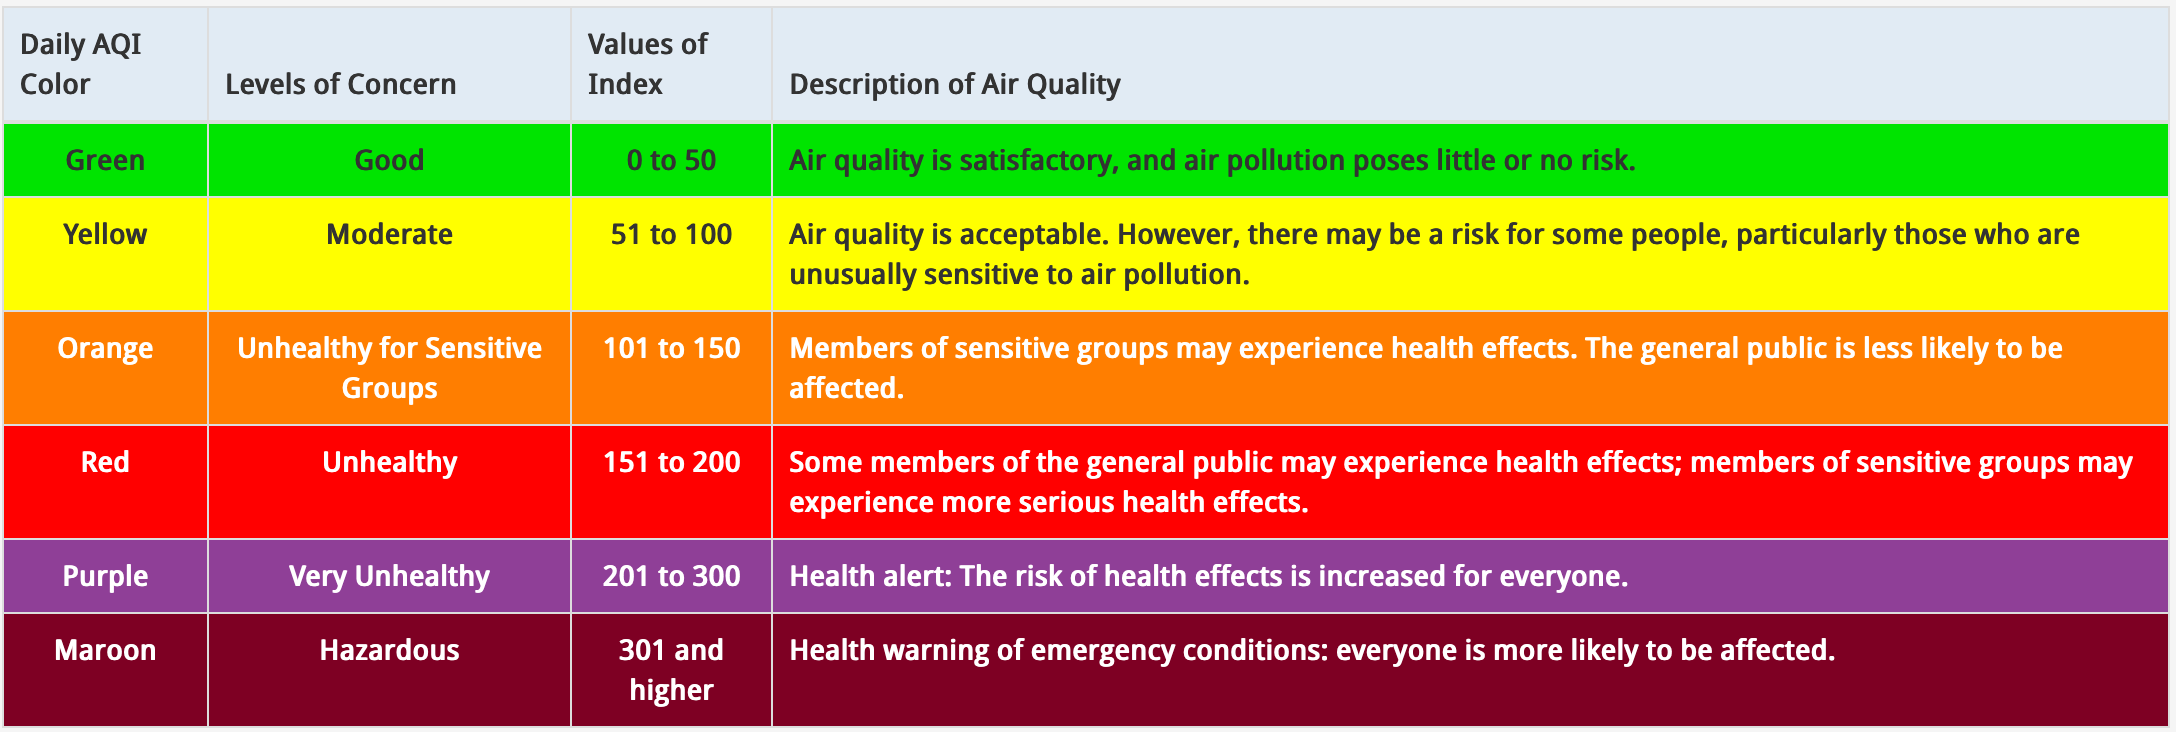

In [23]:
pollution['Index'] = pollution[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].values.max(1)

In [24]:
def aqi(row):
# Separating values into levels of concerns
  if 0 <= row['Index'] <= 50:
    val = 'Good'
  elif 51 <= row['Index'] <= 100:
    val = 'Moderate'
  elif 101 <= row['Index'] <= 150:
    val = 'Unhealthy for Some'
  elif 151 <= row['Index'] <= 200:
    val = 'Unhealthy'
  elif 201 <= row['Index'] <= 300:
    val = 'Very Unhealthy'
  else:
    val = 'Hazardous'

  return val

In [25]:
pollution['Level of Concern'] = pollution.apply(aqi, axis=1)

In [26]:
pollution.head()

,State,City,County,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Index,Level of Concern
0,Alabama,Birmingham,Jefferson,2013-12-01,37.0,24.0,1.0,6.0,37.0,Good
1,Alabama,Birmingham,Jefferson,2013-12-02,30.0,12.0,3.0,6.0,30.0,Good
2,Alabama,Birmingham,Jefferson,2013-12-03,21.0,11.0,3.0,3.0,21.0,Good
3,Alabama,Birmingham,Jefferson,2013-12-04,18.0,13.0,1.0,2.0,18.0,Good
4,Alabama,Birmingham,Jefferson,2013-12-05,15.0,13.0,1.0,2.0,15.0,Good


### Cleaned Data

In [27]:
pollution.to_csv('pollution.csv')

In [28]:
!cp pollution.csv "drive/My Drive/"

### Summary Data

Creating an aggregate of all dates as a summary data to create a unified dataset

In [29]:
summary = pollution.groupby(['State', 'City', 'County', ]).agg(np.mean).reset_index()
summary[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']] = summary[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].round(2)

In [30]:
summary['Index'] = summary[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].values.max(1)

In [31]:
summary['Level of Concern'] = summary.apply(aqi, axis=1)

In [32]:
summary.head()

,State,City,County,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Index,Level of Concern
0,Alabama,Birmingham,Jefferson,21.23,36.83,7.01,3.85,36.83,Good
1,Alaska,Fairbanks,Fairbanks North Star,19.58,17.71,14.51,6.53,19.58,Good
2,Arizona,Phoenix,Maricopa,40.96,40.32,5.44,11.79,40.96,Good
3,Arizona,Scottsdale,Maricopa,41.99,31.46,4.53,11.45,41.99,Good
4,Arizona,Tucson,Pima,27.81,38.50,2.96,5.33,38.50,Good


In [33]:
summary.to_csv('pollution_summary.csv')

In [34]:
!cp pollution_summary.csv "drive/My Drive/"